<a href="https://colab.research.google.com/github/day28645/Applied-Data-Science/blob/main/K_means_clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference

https://www.geeksforgeeks.org/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/

https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [ ]:
iris = load_iris()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data visualization

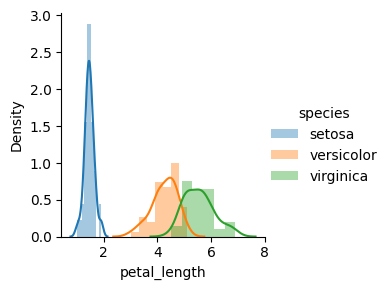

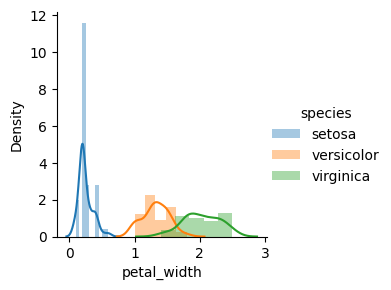

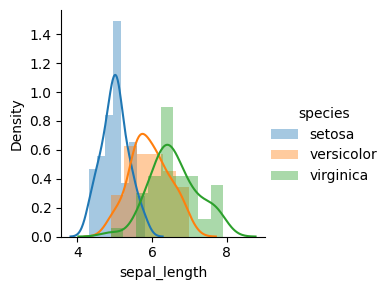

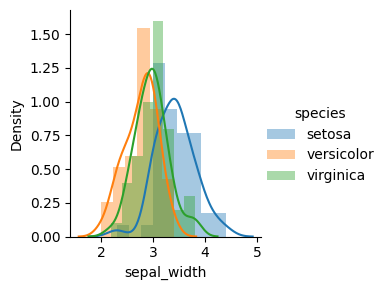

In [ ]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_width").add_legend()
plt.show()

In [ ]:
#Prepare dataset
X = iris.iloc[:, :-2]

### K Means Clustering Algorithm

### Elbow plot

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

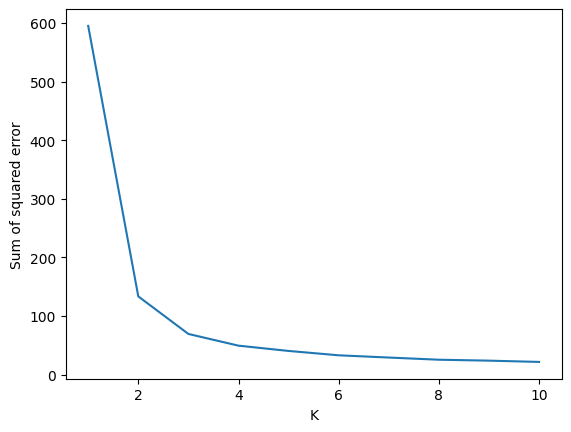

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,11),wcss)

### K = 3

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the clusters

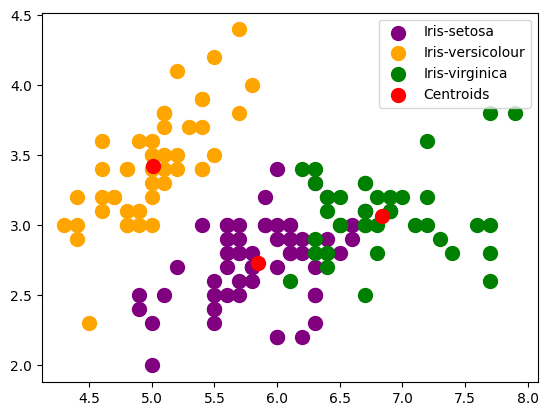

In [ ]:
# Visualising the clusters
cols = iris.columns
plt.scatter(X.loc[y_kmeans == 0, cols[0]],
            X.loc[y_kmeans == 0, cols[1]],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(X.loc[y_kmeans == 1, cols[0]],
            X.loc[y_kmeans == 1, cols[1]],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(X.loc[y_kmeans == 2, cols[0]],
            X.loc[y_kmeans == 2, cols[1]],
            s=100, c='green',
            label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')

plt.legend()